In [2]:
!pip install openpyxl


   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.0 kB 217.9 kB/s eta 0:00:02
   ------ -------------------------------- 41.0/250.0 kB 219.4 kB/s eta 0:00:01
   --------- ----------------------------- 61.4/250.0 kB 273.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.0 kB 350.1 kB/s eta 0:00:01
   ----------------- -------------------- 112.6/250.0 kB 409.6 kB/s eta 0:00:01
   -------------------------------------  245.8/250.0 kB 718.0 kB/s eta 0:00:01
   -------------------------------------  245.8/250.0 kB 718.0 kB/s eta 0:00:01
   -------------------------------------  245.8/250.0 kB 718.0 kB/s eta 0:00:01
   -------------------------------------- 250.0/250.0 kB 529.2 kB/s eta 0:

In [3]:
#modification du dossier de travail
import os

#librairie pandas
import pandas

#chargement de la première feuille de données
X = pandas.read_excel("autos_acp_pour_python.xlsx",sheet_name=0,header=0,index_col=0)

In [5]:
#dimension
print(X.shape) # (18, 6)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
#affichage des données
print(X)

(18, 6)
            CYL  PUISS  LONG  LARG  POIDS  V_MAX
Modele                                          
Voiture1   1350     79   393   161    870    165
Voiture2   1588     85   468   177   1110    160
Voiture3   1294     68   424   168   1050    152
Voiture4   1222     59   412   161    930    151
Voiture5   1585     98   439   164   1105    165
Voiture6   1297     82   429   169   1080    160
Voiture7   1796     79   449   169   1160    154
Voiture8   1565     55   424   163   1010    140
Voiture9   2664    128   452   173   1320    180
Voiture10  1166     55   399   157    815    140
Voiture11  1570    109   428   162   1060    175
Voiture12  1798     82   445   172   1160    158
Voiture13  1998    115   469   169   1370    160
Voiture14  1993     98   438   170   1080    167
Voiture15  1442     80   431   166   1129    144
Voiture16  1769     83   440   165   1095    165
Voiture17  1979    100   459   173   1120    173
Voiture18  1294     68   404   161    955    140


In [6]:
#scikit-learn
import sklearn


In [7]:
#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

In [8]:
#vérification - librairie numpy
import numpy
#moyenne
print(numpy.mean(Z,axis=0))


[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]


In [9]:
#écart-type
print(numpy.std(Z,axis=0,ddof=0))


[1. 1. 1. 1. 1. 1.]


In [10]:
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


In [11]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 6


6


In [12]:
#variance expliquée
print(acp.explained_variance_)

[4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676]


In [13]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [14]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)


[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [15]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


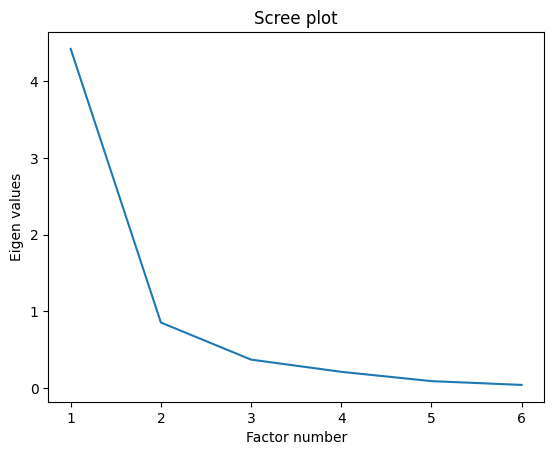

In [16]:
import numpy as np
import matplotlib.pyplot as plt
#scree plot
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

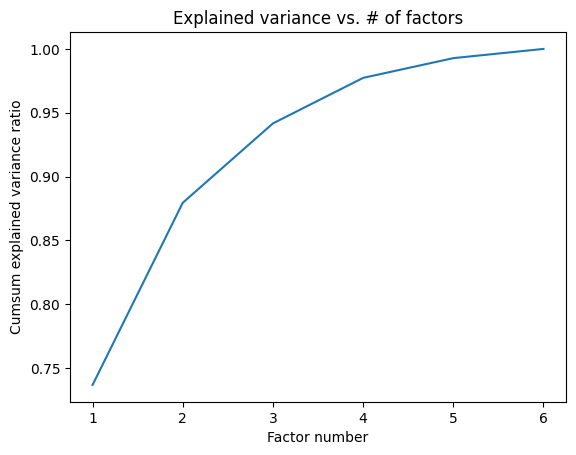

In [17]:
#cumul de variance expliquée
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

## Yassine

In [18]:
#seuils pour test des bâtons brisés
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]

In [19]:
#test des bâtons brisés
print(pandas.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.420858  2.450000
1    0.856062  1.450000
2    0.373066  0.950000
3    0.213922  0.616667
4    0.092801  0.366667
5    0.043290  0.166667


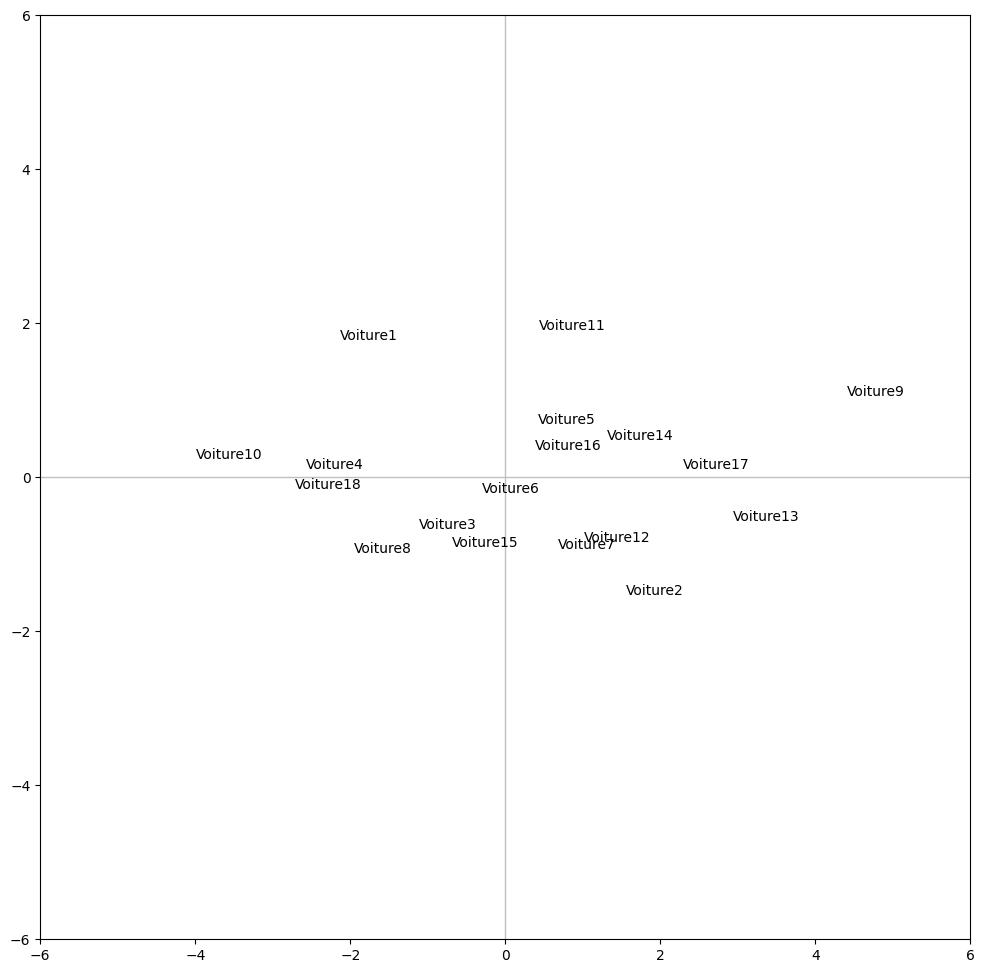

In [20]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
  plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [21]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pandas.DataFrame({'ID':X.index,'d_i':di}))

           ID        d_i
0    Voiture1   8.225176
1    Voiture2   6.673755
2    Voiture3   2.159327
3    Voiture4   6.780145
4    Voiture5   1.169124
5    Voiture6   1.134950
6    Voiture7   1.512793
7    Voiture8   5.636826
8    Voiture9  21.789657
9   Voiture10  16.290143
10  Voiture11   4.456770
11  Voiture12   1.952513
12  Voiture13  11.112624
13  Voiture14   2.452986
14  Voiture15   1.963373
15  Voiture16   0.684521
16  Voiture17   6.083119
17  Voiture18   7.922198


In [22]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pandas.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

           id    COS2_1    COS2_2
0    Voiture1  0.556218  0.387670
1    Voiture2  0.365334  0.349406
2    Voiture3  0.580284  0.210694
3    Voiture4  0.976992  0.001879
4    Voiture5  0.156579  0.413826
5    Voiture6  0.081555  0.033900
6    Voiture7  0.309202  0.575488
7    Voiture8  0.673539  0.170535
8    Voiture9  0.892431  0.051920
9   Voiture10  0.975219  0.003426
10  Voiture11  0.042978  0.820652
11  Voiture12  0.530947  0.362855
12  Voiture13  0.778390  0.028137
13  Voiture14  0.704819  0.096496
14  Voiture15  0.243273  0.410469
15  Voiture16  0.217336  0.185337
16  Voiture17  0.861900  0.001790
17  Voiture18  0.926052  0.002607


In [23]:
#vérifions la théorie - somme en ligne des cos2 = 1
print(numpy.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [24]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])
print(pandas.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))


           id     CTR_1     CTR_2
0    Voiture1  0.057493  0.206933
1    Voiture2  0.030640  0.151329
2    Voiture3  0.015746  0.029525
3    Voiture4  0.083244  0.000827
4    Voiture5  0.002300  0.031398
5    Voiture6  0.001163  0.002497
6    Voiture7  0.005878  0.056499
7    Voiture8  0.047711  0.062384
8    Voiture9  0.244369  0.073419
9   Voiture10  0.199640  0.003622
10  Voiture11  0.002407  0.237357
11  Voiture12  0.013028  0.045978
12  Voiture13  0.108701  0.020292
13  Voiture14  0.021727  0.015361
14  Voiture15  0.006002  0.052300
15  Voiture16  0.001870  0.008233
16  Voiture17  0.065888  0.000707
17  Voiture18  0.092194  0.001340


In [25]:
#vérifions la théorie
print(numpy.sum(ctr,axis=0))


[1. 1. 1. 1. 1. 1.]


In [26]:
#le champ components_ de l'objet ACP
print(acp.components_)


[[ 0.42493602  0.42179441  0.42145993  0.38692224  0.43051198  0.35894427]
 [ 0.12419108  0.41577389 -0.41181773 -0.446087   -0.24267581  0.6198626 ]
 [-0.35361252 -0.18492049  0.06763394  0.60486812 -0.48439601  0.48547226]
 [ 0.80778648 -0.35779199 -0.27975231  0.21156941 -0.30171136 -0.0735743 ]
 [ 0.15158003 -0.29373465  0.73056903 -0.47819008 -0.30455842  0.18865511]
 [-0.05889517 -0.63303302 -0.19029153 -0.10956624  0.5808122   0.45852167]]


In [27]:
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)
#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [28]:
#on affiche pour les deux premiers axes
print(pandas.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

      id     COR_1     COR_2
0    CYL  0.893464  0.114906
1  PUISS  0.886858  0.384689
2   LONG  0.886155 -0.381029
3   LARG  0.813536 -0.412736
4  POIDS  0.905187 -0.224532
5  V_MAX  0.754710  0.573519


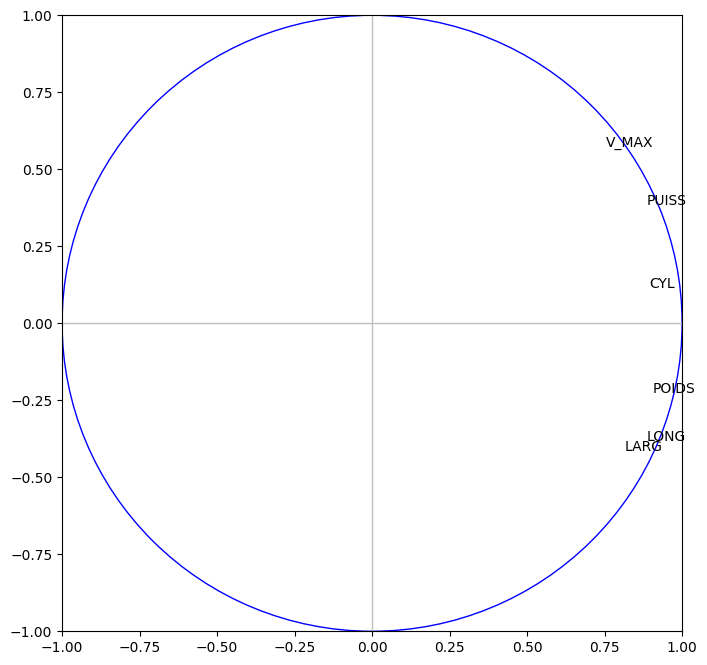

In [29]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [30]:
#cosinus carré des variables
cos2var = corvar**2
print(pandas.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))


      id    COS2_1    COS2_2
0    CYL  0.798277  0.013203
1  PUISS  0.786517  0.147986
2   LONG  0.785270  0.145183
3   LARG  0.661841  0.170351
4  POIDS  0.819364  0.050415
5  V_MAX  0.569588  0.328925


In [31]:
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pandas.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))


      id     CTR_1     CTR_2
0    CYL  0.180571  0.015423
1  PUISS  0.177911  0.172868
2   LONG  0.177628  0.169594
3   LARG  0.149709  0.198994
4  POIDS  0.185341  0.058892
5  V_MAX  0.128841  0.384230


# 4 Traitement des individus et variables illustratifs

 **4.1 Individus supplémentaires**

individus supplémentaires est une fonctionnalité importante de l’analyse en composantes principales.

L'objectif est de positionner de nouveaux individus par rapport aux individus actifs dans le graphique du premier plan factoriel.

Voici les étapes des traitements réalisés :

Importer les données.

Calculer la matrice centrée et réduite.

Calculer les coordonnées des individus supplémentaires.

Examiner la présentation des individus supplémentaires dans le premier plan factoriel.

Nous souhaitons positionner deux véhicules supplémentaires, par rapport aux existantes, En utilisant la fonction read_excel() pour importer des données, elles sont situées dans la deuxième feuille du classeur Excel (sheet_name = 1).

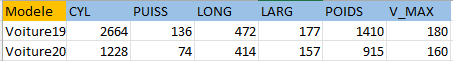

In [32]:
#chargement des individus supplémentaires
indSupp = pandas.read_excel("autos_acp_pour_python.xlsx",sheet_name=1,header=0,index_col=0)
print(indSupp)


            CYL  PUISS  LONG  LARG  POIDS  V_MAX
Modele                                          
Voiture19  2664    136   472   177   1410    180
Voiture20  1228     74   414   157    915    160


Nous devons centrées et réduites les variables des individus supplémentaires à l’aide des paramètres (moyennes et écarts-type) des données actives , vous pouvez utiliser le même objet StandardScaler .

In [33]:
#centrage-réduction avec les paramètres des individus actifs
ZIndSupp = sc.transform(indSupp)
print(ZIndSupp)


[[ 2.84080623  2.59511201  1.79199036  2.0010414   2.48812166  1.84112668]
 [-1.1108222  -0.53585556 -0.90763148 -1.87194195 -1.23091273  0.14597168]]


Donc pour calculer les coordonnées des individus supplémentaires dans l'espace factoriel, En utilisant la fonction transform() de l’objet PCA.

In [34]:
#projection dans l'espace factoriel
coordSupp = acp.transform(ZIndSupp)
print(coordSupp)


[[ 5.56329226  0.33860928 -0.46428878  0.40214608 -0.38981076 -0.08102064]
 [-2.2824025   1.23727388 -0.03465898 -0.48707538  0.62350065  0.1344546 ]]


Positionnement des individus supplémentaires dans le premier plan.

L'objectif principal du positionnement des individus supplémentaires dans le premier plan est d'évaluer leur positionnement relatif par rapport aux individus déjà présents dans l'espace factoriel.

Vous pouvez utiliser la matrice coordSupp qui contient les coordonnées des individus supplémentaires dans l'espace factoriel.

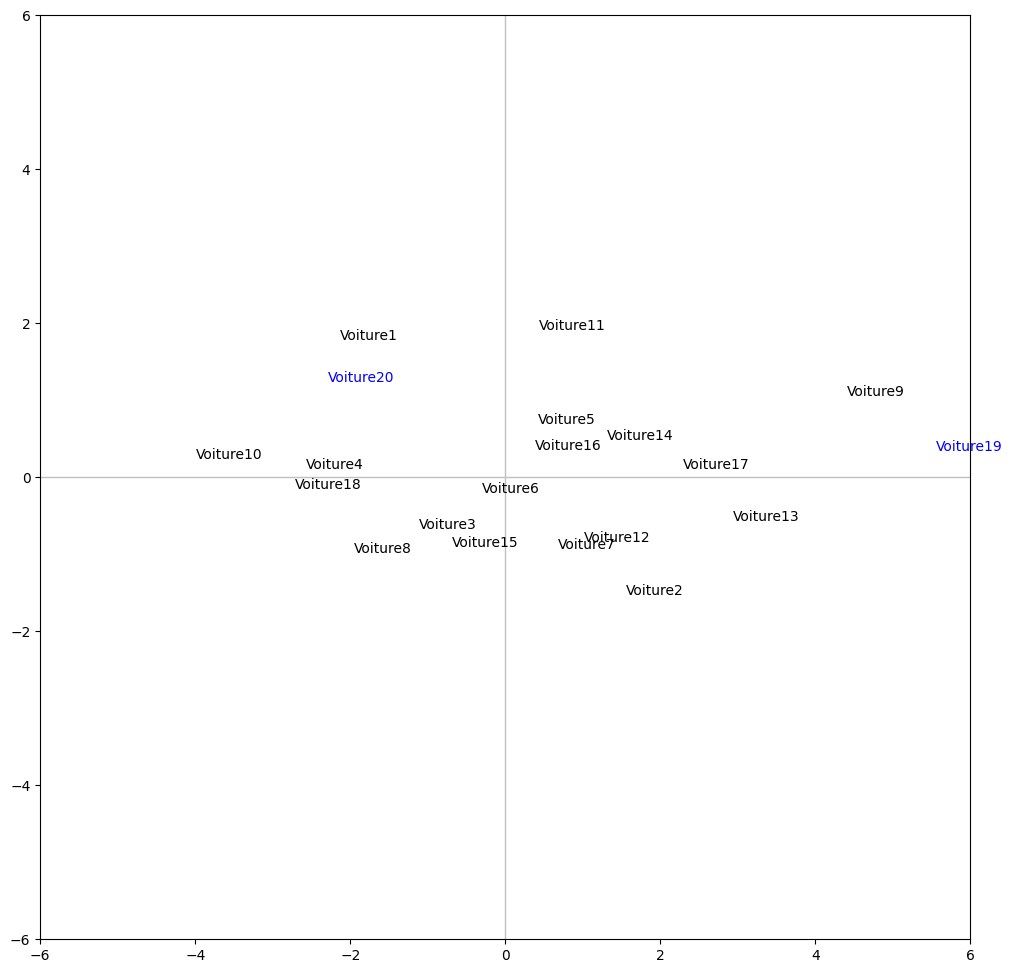

In [35]:
#Initialisation Une nouvelle figure est créée avec une taille de 12x12.
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)
#étiquette des points actifs
for i in range(n):
 plt.annotate(X.index[i],(coord[i,0],coord[i,1]))

#étiquette des points supplémentaires (illustratifs) en bleu ‘b’
for i in range(coordSupp.shape[0]):
 plt.annotate(indSupp.index[i],(coordSupp[i,0],coordSupp[i,1]),color='b')
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

**4.2 Variables illustratives**

les variables illustratives sont utilisées pour compléter et enrichir l'interprétation des résultats obtenus à partir des variables actives. Elles ne sont pas utilisées pour leur construction, Les variables illustratives sont ajoutées après coup pour apporter des informations supplémentaires et faciliter la compréhension des relations entre les observations.

Nous souhaitons importer les variables supplémentaires depuis la troisième feuille du classeur Excel .Il faut avoir exactement les mêmes observations que les données actives.


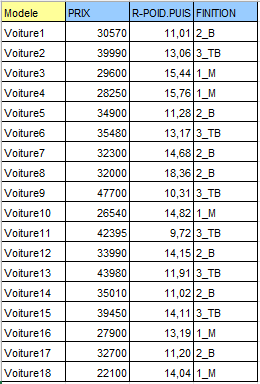

In [36]:
#importation des variables supplémentaires
varSupp = pandas.read_excel("autos_acp_pour_python.xlsx",sheet_name=2,header=0,index_col=0)
print(varSupp)

            PRIX  R-POID.PUIS FINITION
Modele                                
Voiture1   30570    11.012658      2_B
Voiture2   39990    13.058824     3_TB
Voiture3   29600    15.441176      1_M
Voiture4   28250    15.762712      1_M
Voiture5   34900    11.275510      2_B
Voiture6   35480    13.170732     3_TB
Voiture7   32300    14.683544      2_B
Voiture8   32000    18.363636      2_B
Voiture9   47700    10.312500     3_TB
Voiture10  26540    14.818182      1_M
Voiture11  42395     9.724771     3_TB
Voiture12  33990    14.146341      2_B
Voiture13  43980    11.913043     3_TB
Voiture14  35010    11.020408      2_B
Voiture15  39450    14.112500     3_TB
Voiture16  27900    13.192771      1_M
Voiture17  32700    11.200000      2_B
Voiture18  22100    14.044118      1_M


**Variables illustratives quantitatives**

Nous récupérons les variables quantitatives dans une structure à part.

In [37]:
# sélectionnera les deux premières colonnes de varSupp qui contiennent les variables supplémentaires.
vsQuanti = varSupp.iloc[:,:2].values
print(vsQuanti)


[[3.05700000e+04 1.10126582e+01]
 [3.99900000e+04 1.30588235e+01]
 [2.96000000e+04 1.54411765e+01]
 [2.82500000e+04 1.57627119e+01]
 [3.49000000e+04 1.12755102e+01]
 [3.54800000e+04 1.31707317e+01]
 [3.23000000e+04 1.46835443e+01]
 [3.20000000e+04 1.83636364e+01]
 [4.77000000e+04 1.03125000e+01]
 [2.65400000e+04 1.48181818e+01]
 [4.23950000e+04 9.72477064e+00]
 [3.39900000e+04 1.41463415e+01]
 [4.39800000e+04 1.19130435e+01]
 [3.50100000e+04 1.10204082e+01]
 [3.94500000e+04 1.41125000e+01]
 [2.79000000e+04 1.31927711e+01]
 [3.27000000e+04 1.12000000e+01]
 [2.21000000e+04 1.40441176e+01]]


Calculez les corrélations entre les variables supplémentaires quantitatives et les axes factoriels en utilisant la fonction corrcoef(). Cette fonction permet de calculer la corrélation entre les valeurs de la variable quantitative et les coordonnées des observations sur l'axe factoriel correspondant.

In [38]:
#Initialisation une matrice des corrélations avec les axes factoriels
corSupp = numpy.zeros((vsQuanti.shape[1],p))
print(corSupp)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [39]:
#corrélation avec les axes factoriels
for k in range(p):
 for j in range(vsQuanti.shape[1]):
  corSupp[j,k] = numpy.corrcoef(vsQuanti[:,j],coord[:,k])[0,1]
#affichage des corrélations avec les axes
print(corSupp)

[[ 0.77247524  0.08670844 -0.13389277 -0.22582891 -0.15944978 -0.10254878]
 [-0.58903888 -0.67254512 -0.15017616  0.21365718  0.10162791  0.28999742]]


Maintenant, nous souhaitons positionner les variables supplémentaires dans le cercle des corrélations en utilisant leurs nouvelles coordonnées des corrélations avec les axes factoriels.

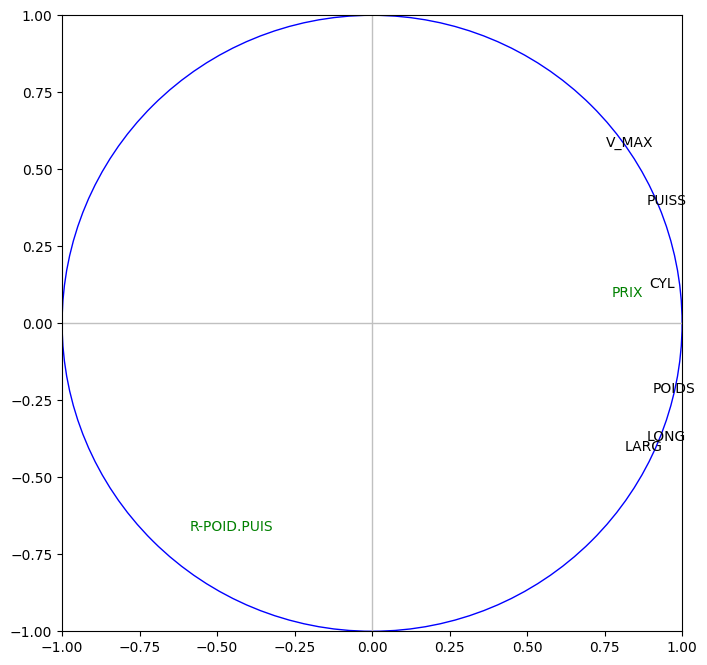

In [40]:
#cercle des corrélations avec les var. supp
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#variables actives
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
#variables illustratives
for j in range(vsQuanti.shape[1]):
 plt.annotate(varSupp.columns[j],(corSupp[j,0],corSupp[j,1]),color='g')
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

**Variables illustratives qualitative**

Nous souhaitons isoler la variable illustrative qualitative dans une structure spécifique et afficher la liste de ses valeurs.

In [41]:
#traitement de var. quali supplémentaire
vsQuali = varSupp.iloc[:,2]
print(vsQuali)


Modele
Voiture1      2_B
Voiture2     3_TB
Voiture3      1_M
Voiture4      1_M
Voiture5      2_B
Voiture6     3_TB
Voiture7      2_B
Voiture8      2_B
Voiture9     3_TB
Voiture10     1_M
Voiture11    3_TB
Voiture12     2_B
Voiture13    3_TB
Voiture14     2_B
Voiture15    3_TB
Voiture16     1_M
Voiture17     2_B
Voiture18     1_M
Name: FINITION, dtype: object


Puis nous récupérons la liste des modalités.

In [42]:
#modalités de la variable qualitative
modalites = numpy.unique(vsQuali)
print(modalites)

['1_M' '2_B' '3_TB']


Pour calculer les positions des barycentres conditionnels.

In [43]:
#structure intermédiaire
df = pandas.DataFrame({'Finition':vsQuali,'F1':coord[:,0],'F2':coord[:,1]})
#puis calculer les moyennes conditionnelles
print(df.pivot_table(index='Finition',values=['F1','F2'],aggfunc=pandas.Series.mean))

                F1        F2
Finition                    
1_M      -2.000355 -0.022579
2_B       0.235313  0.045271
3_TB      1.392430 -0.034001
